In [19]:
#All-ones or all-zeros tensors
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

#try another
y = tf.ones(shape=(3, 2))
print(y)



tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [20]:
x = tf.zeros(shape=(2, 1))
print(x)

#try another

y = tf.zeros(shape=(3, 1))
print(y)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]
 [0.]], shape=(3, 1), dtype=float32)


In [21]:
#Random tensors
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

#try another
y = tf.random.normal(shape=(3,21), mean=0., stddev=2.)
print(y)

x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[ 0.09455398]
 [-0.4451501 ]
 [-1.2418848 ]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[-3.2372985  -2.8922954   1.7184024  -2.949624    0.94266593  0.3191995
   2.6772912  -2.3400795   0.4036149  -3.7216585   2.4885235  -1.6439981
  -1.4205966   3.6964478  -0.6829552   1.1930876  -0.2796229  -1.3767685
   0.44485107  2.9551904  -0.27917838]
 [-4.211118   -3.6322923  -2.0108094  -4.017446   -0.8283899   1.206526
   3.5778613  -1.9979335  -1.9045943   4.2950873   3.489011   -0.95824957
   0.2731162  -1.2432852  -0.09518867  0.2759285  -1.0676309  -2.4308677
   0.23335807  1.1306827  -0.2567506 ]
 [ 1.3320286  -0.8838639   0.5465584  -1.8677422   0.7379851   2.8982248
  -3.5051477   0.29246292  0.46714443 -1.3016491   0.89235586 -1.555067
  -2.4903731  -2.4367085  -1.7690634   3.161453    1.2737381  -0.4948675
  -1.2221656  -0.94916534 -2.8499436 ]], shape=(3, 21), dtype=float32)
tf.Tensor(
[[0.8581852 ]
 [0.33808565]
 [0.80732   ]], shape=(3, 1), dtype=float32)


In [5]:
#NumPy arrays are assignable

import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

#Creating a TensorFlow variable

v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)
#Assigning a value to a TensorFlow variable

v.assign(tf.ones((3, 1)))
#Assigning a value to a subset of a TensorFlow variable

v[0, 0].assign(3.)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.10187621],
       [-0.24946716],
       [ 1.577556  ]], dtype=float32)>


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [22]:
#Using assign_add

v.assign_add(tf.ones((3, 1)))

#Tensor operations: Doing math in TensorFlow
#A few basic math operations

a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#A second look at the GradientTape API
#Using the GradientTape

input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [7]:
#Using GradientTape with constant tensor inputs

input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
#Using nested gradient tapes to compute second-order gradients

time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

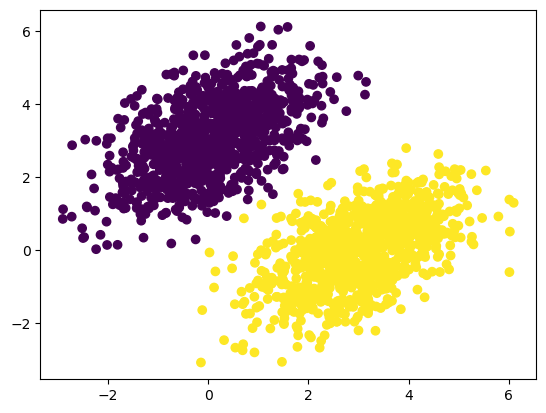

In [24]:
#An end-to-end example: A linear classifier in pure TensorFlow
#Generating two classes of random points in a 2D plane

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
#Stacking the two classes into an array with shape (2000, 2)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
#Generating the corresponding targets (0 and 1)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
#Plotting the two point classes

import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

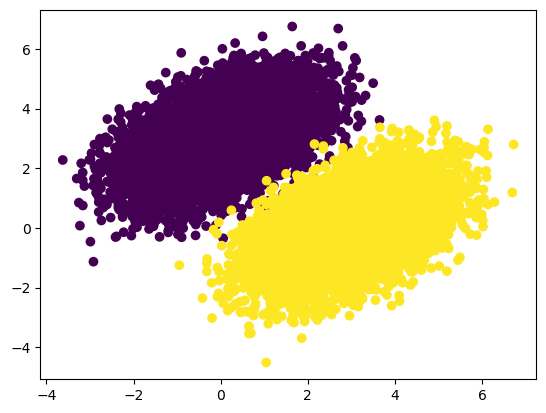

In [25]:
#An end-to-end example: A linear classifier in pure TensorFlow
#Generating two classes of random points in a 2D plane
#num_samples_per_class 改為 10000後會發現圖變密集了
num_samples_per_class = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
#Stacking the two classes into an array with shape (2000, 2)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
#Generating the corresponding targets (0 and 1)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
#Plotting the two point classes

import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [9]:
#Creating the linear classifier variables

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
#The forward pass function

def model(inputs):
    return tf.matmul(inputs, W) + b
#The mean squared error loss function

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)
#The training step function

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

Loss at step 0: 2.5336
Loss at step 1: 0.2346
Loss at step 2: 0.1254
Loss at step 3: 0.1073
Loss at step 4: 0.0991
Loss at step 5: 0.0925
Loss at step 6: 0.0865
Loss at step 7: 0.0811
Loss at step 8: 0.0762
Loss at step 9: 0.0717
Loss at step 10: 0.0676
Loss at step 11: 0.0639
Loss at step 12: 0.0605
Loss at step 13: 0.0574
Loss at step 14: 0.0546
Loss at step 15: 0.0520
Loss at step 16: 0.0497
Loss at step 17: 0.0475
Loss at step 18: 0.0456
Loss at step 19: 0.0438
Loss at step 20: 0.0422
Loss at step 21: 0.0408
Loss at step 22: 0.0394
Loss at step 23: 0.0382
Loss at step 24: 0.0371
Loss at step 25: 0.0361
Loss at step 26: 0.0352
Loss at step 27: 0.0343
Loss at step 28: 0.0336
Loss at step 29: 0.0329
Loss at step 30: 0.0323
Loss at step 31: 0.0317
Loss at step 32: 0.0312
Loss at step 33: 0.0307
Loss at step 34: 0.0303
Loss at step 35: 0.0299
Loss at step 36: 0.0295
Loss at step 37: 0.0292
Loss at step 38: 0.0289
Loss at step 39: 0.0286


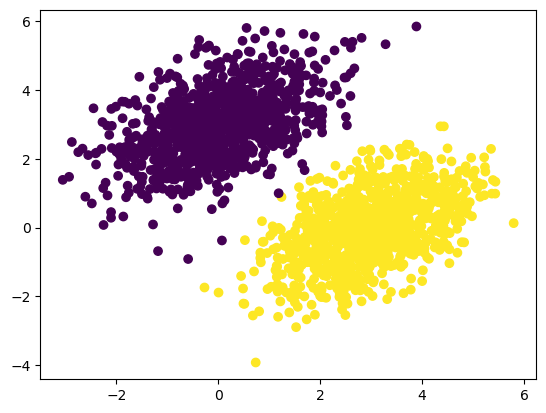

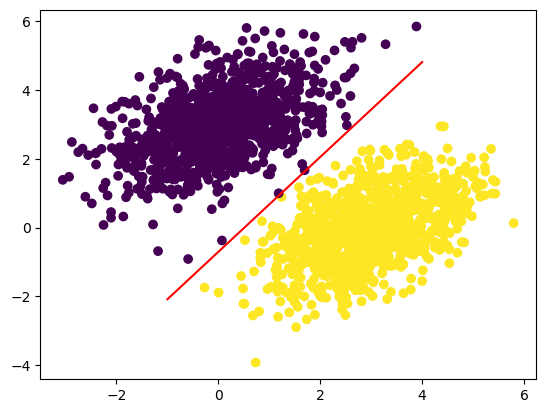

In [10]:
#The batch training loop

for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [ ]:
Anatomy of a neural network: Understanding core Keras APIs
Layers: The building blocks of deep learning
The base Layer class in Keras
A Dense layer implemented as a Layer subclass

In [11]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [12]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [13]:
#Automatic shape inference: Building layers on the fly
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [14]:
#From layers to models
#The "compile" step: Configuring the learning process
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [15]:
#Picking a loss function
#Understanding the fit() method
#Calling fit() with NumPy data

history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)
history.history

Epoch 1/5
16/16 [==============================] - 0s 693us/step - loss: 1.0184 - binary_accuracy: 0.1455
Epoch 2/5
16/16 [==============================] - 0s 660us/step - loss: 0.9123 - binary_accuracy: 0.1735
Epoch 3/5
16/16 [==============================] - 0s 630us/step - loss: 0.8270 - binary_accuracy: 0.2040
Epoch 4/5
16/16 [==============================] - 0s 617us/step - loss: 0.7492 - binary_accuracy: 0.2305
Epoch 5/5
16/16 [==============================] - 0s 565us/step - loss: 0.6764 - binary_accuracy: 0.2600


{'loss': [1.0184109210968018,
  0.9122869968414307,
  0.8270345330238342,
  0.7491757273674011,
  0.6764411330223083],
 'binary_accuracy': [0.14550000429153442,
  0.17350000143051147,
  0.20399999618530273,
  0.2304999977350235,
  0.25999999046325684]}

In [17]:
#Monitoring loss and metrics on validation data
#Using the validation_data argument

model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)


Epoch 1/5
88/88 [==============================] - 0s 2ms/step - loss: 0.2679 - binary_accuracy: 0.8957 - val_loss: 0.0318 - val_binary_accuracy: 1.0000
Epoch 2/5
88/88 [==============================] - 0s 809us/step - loss: 0.0711 - binary_accuracy: 0.9521 - val_loss: 0.1203 - val_binary_accuracy: 0.9633
Epoch 3/5
88/88 [==============================] - 0s 791us/step - loss: 0.0766 - binary_accuracy: 0.9521 - val_loss: 0.0324 - val_binary_accuracy: 0.9983
Epoch 4/5
88/88 [==============================] - 0s 806us/step - loss: 0.0712 - binary_accuracy: 0.9521 - val_loss: 0.0433 - val_binary_accuracy: 0.9983
Epoch 5/5
88/88 [==============================] - 0s 780us/step - loss: 0.0716 - binary_accuracy: 0.9479 - val_loss: 0.1536 - val_binary_accuracy: 0.9667


In [18]:
#Inference: Using a model after training
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 2ms/step
[[ 1.5981072 ]
 [ 1.2942426 ]
 [ 1.0608739 ]
 [ 1.6881673 ]
 [ 1.4859458 ]
 [ 1.1799171 ]
 [-0.06938064]
 [ 1.2054354 ]
 [ 1.3996513 ]
 [ 0.23276666]]
